In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import logging
import xgboost as xgb
from sklearn import svm
from catboost import CatBoostClassifier, Pool

In [32]:
logging.basicConfig(level=logging.INFO)

In [33]:
input_csv = '../model_training/csv/dataset.csv'
df = pd.read_csv(input_csv)
logging.info(df.head())

INFO:root:     ID                                               text       class  \
0  2025  accountant professional summary skill work his...  ACCOUNTANT   
1  2026  accountant summary business management graduat...  ACCOUNTANT   
2  2027  investment accountant career focus accomplish ...  ACCOUNTANT   
3  2028  staff accountant summary professional accounta...  ACCOUNTANT   
4  2029  accountant summary senior level finance manage...  ACCOUNTANT   

   class_number  senior  
0             0       1  
1             0       1  
2             0       1  
3             0       2  
4             0       2  


In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['class_number'], test_size=0.33, random_state=12, stratify=df['class_number']
)

In [35]:
def plot_confusion_matrix(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    correct_sum = sum(conf_mat[i][i] for i in range(conf_mat.shape[0]))
    incorrect_sum = sum(sum(row) for row in conf_mat) - correct_sum
    print(f"Correct predictions: {correct_sum}")
    print(f"Incorrect predictions: {incorrect_sum}")
    plt.figure(figsize=(20, 10)) 
    plt.imshow(conf_mat, interpolation='nearest', cmap='Purples')
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("True")
    class_names = [str(i) for i in range(26)]
    plt.xticks(range(conf_mat.shape[1]), class_names)
    plt.yticks(range(conf_mat.shape[0]), class_names)
    
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            plt.text(j, i, str(conf_mat[i, j]), ha="center", va="center", color="red")
    
    plt.show()

In [36]:
def train_naive_bayes(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = MultinomialNB()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [37]:
def train_random_forest(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = RandomForestClassifier()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy


In [38]:
def train_bernoulli(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = BernoulliNB()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [39]:
def train_logistic_regression(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [40]:
def train_knn(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = KNeighborsClassifier(n_neighbors=9)
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [41]:
def train_xgboost(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = xgb.XGBClassifier()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [42]:
def train_svm(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = svm.SVC()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [43]:
def train_xgboost2(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = xgb.XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=1000, gamma=0, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, reg_lambda=1)
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [44]:
def train_catboost(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    train_pool = Pool(data=X_train_tfidf, label=y_train)
    test_pool = Pool(data=X_test_tfidf, label=y_test)
    clf = CatBoostClassifier(
        max_depth=6,
        learning_rate=0.1,
        n_estimators=1000,
        l2_leaf_reg=0
    )
    clf.fit(train_pool, verbose=0)
    y_pred = clf.predict(test_pool)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [45]:
def plot_accuracies(accuracies):
  models = list(accuracies.keys())
  acc_values = list(accuracies.values())
  cmap = plt.cm.tab10 
  colors = cmap(np.arange(len(models)) % cmap.N)
  plt.figure(figsize=(10, 8))
  bars = plt.bar(models, acc_values, color=colors)
  for bar, acc in zip(bars, acc_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=8)
  plt.ylabel('Accuracies')
  plt.ylim([0, 1])
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

Accuracy: 0.3803888419273035
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.68      0.54        59
           1       0.24      0.21      0.22        58
           2       0.10      0.04      0.05        27
           3       0.35      0.16      0.22        37
           4       0.33      0.11      0.16        47
           5       0.12      0.32      0.17        19
           6       0.67      0.28      0.39        43
           7       0.35      0.40      0.38        52
           8       0.00      0.00      0.00        15
           9       0.41      0.46      0.43        52
          10       0.79      0.59      0.68        46
          11       0.45      0.64      0.53        45
          12       0.21      0.13      0.16        46
          13       0.54      0.49      0.52        51
          14       0.38      0.38      0.38        47
          15       0.31      0.52      0.39        73
          16       0.35      

/home/vini/dev/cv-indexing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vini/dev/cv-indexing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vini/dev/cv-indexing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

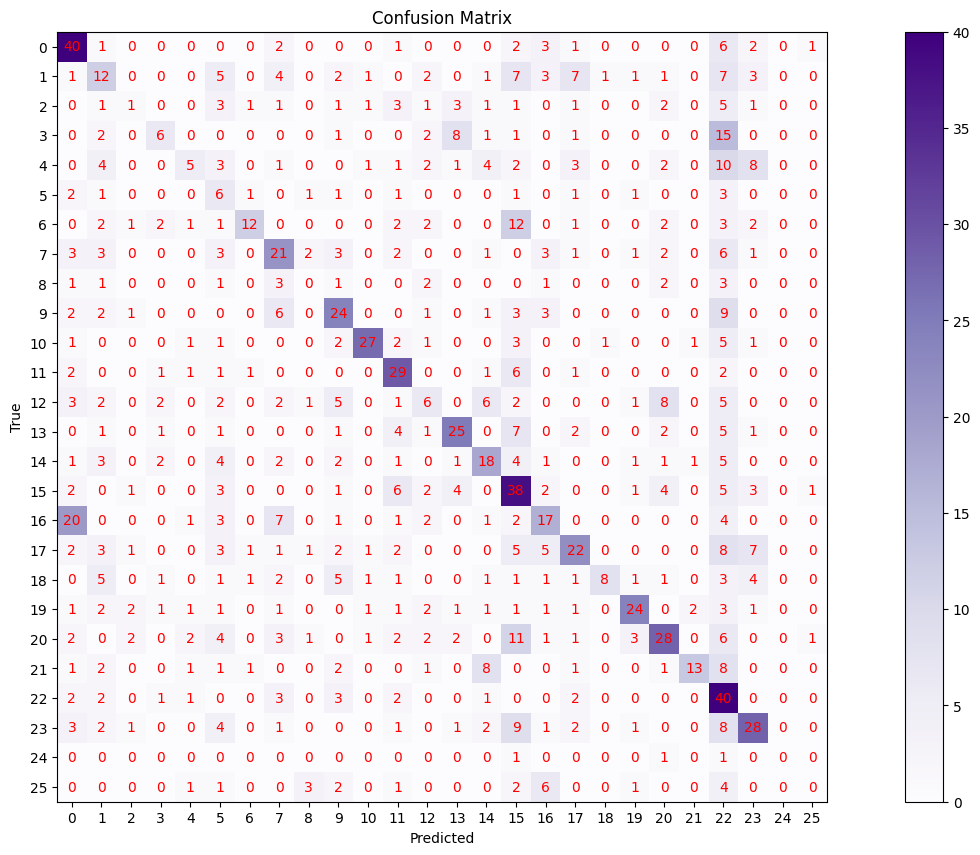

In [46]:
knn_accuracy = train_knn(X_train, y_train, X_test, y_test)


Accuracy: 0.5164835164835165
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.75      0.58        59
           1       0.44      0.60      0.51        58
           2       1.00      0.15      0.26        27
           3       0.58      0.30      0.39        37
           4       0.53      0.17      0.26        47
           5       0.00      0.00      0.00        19
           6       0.57      0.49      0.53        43
           7       0.77      0.46      0.58        52
           8       0.00      0.00      0.00        15
           9       0.35      0.60      0.44        52
          10       0.80      0.72      0.76        46
          11       0.68      0.60      0.64        45
          12       0.19      0.09      0.12        46
          13       0.68      0.51      0.58        51
          14       0.76      0.40      0.53        47
          15       0.39      0.66      0.49        73
          16       0.54      

/home/vini/dev/cv-indexing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vini/dev/cv-indexing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vini/dev/cv-indexing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

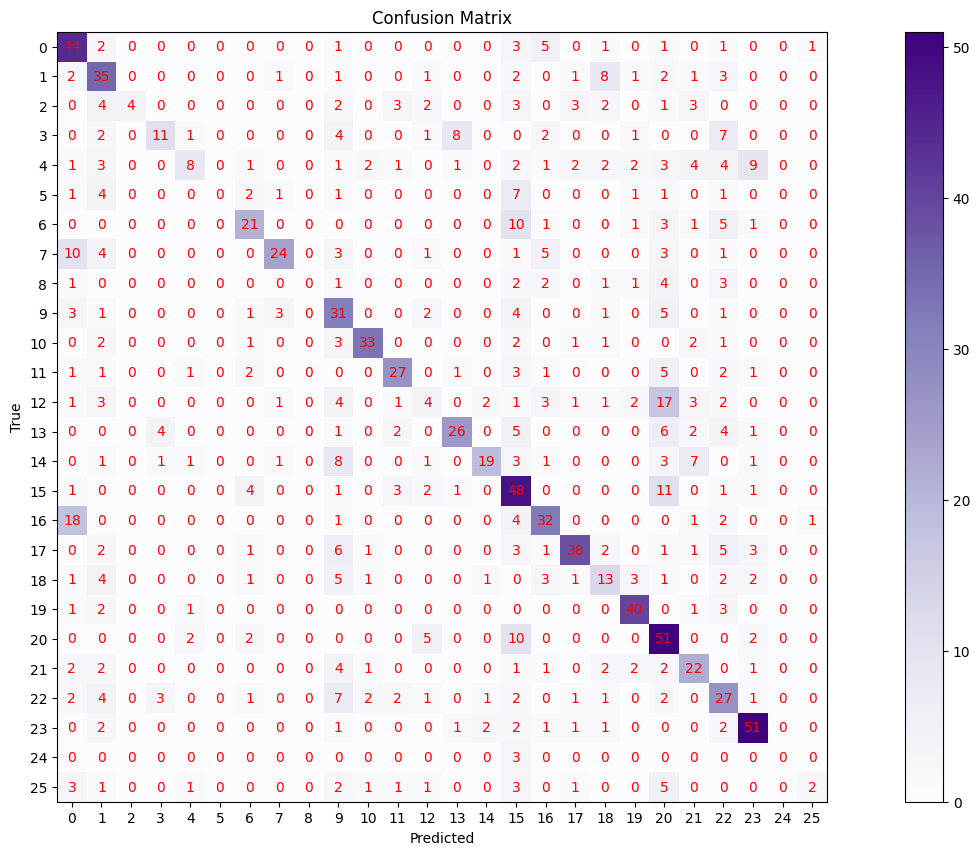

In [47]:
nb_accuracy = train_naive_bayes(X_train, y_train, X_test, y_test)


Accuracy: 0.6052409129332206
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.83      0.66        59
           1       0.64      0.74      0.69        58
           2       0.88      0.26      0.40        27
           3       0.64      0.24      0.35        37
           4       0.67      0.09      0.15        47
           5       0.67      0.11      0.18        19
           6       0.74      0.65      0.69        43
           7       0.70      0.73      0.72        52
           8       1.00      0.07      0.12        15
           9       0.44      0.46      0.45        52
          10       0.74      0.91      0.82        46
          11       0.83      0.67      0.74        45
          12       0.55      0.13      0.21        46
          13       0.64      0.80      0.71        51
          14       0.62      0.53      0.57        47
          15       0.54      0.84      0.66        73
          16       0.57      

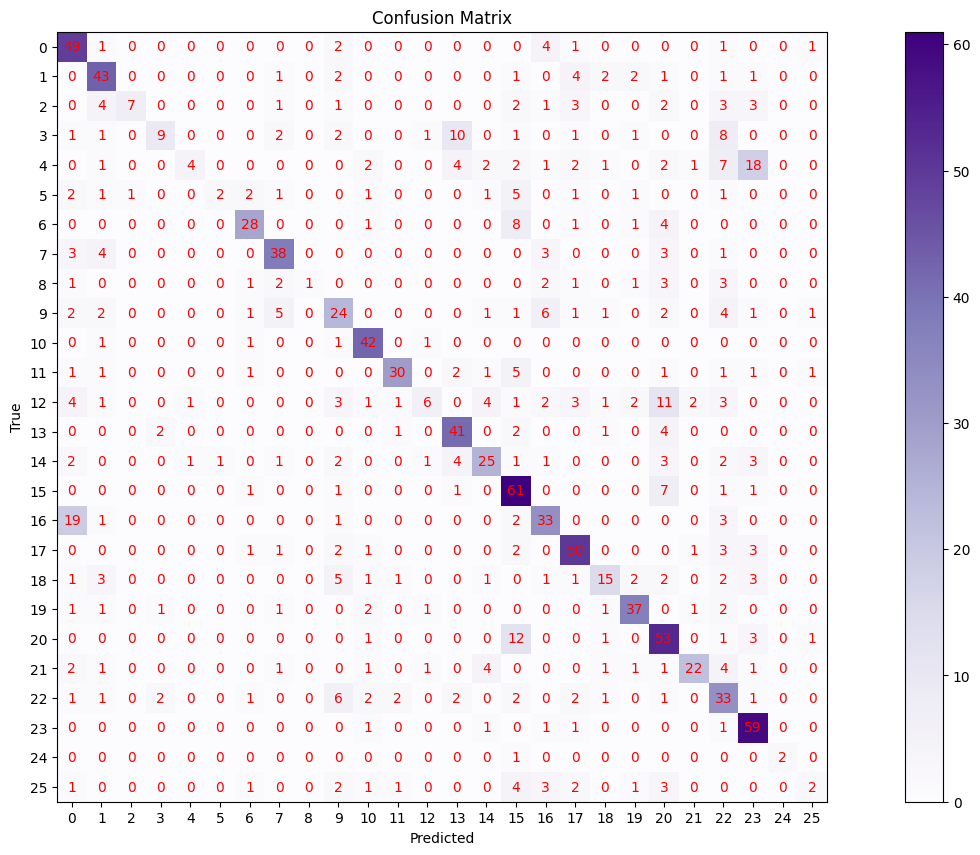

In [48]:
rf_accuracy = train_random_forest(X_train, y_train, X_test, y_test)


Accuracy: 0.6229923922231615
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.83      0.73        59
           1       0.73      0.69      0.71        58
           2       0.65      0.56      0.60        27
           3       0.50      0.51      0.51        37
           4       0.55      0.36      0.44        47
           5       0.41      0.37      0.39        19
           6       0.81      0.60      0.69        43
           7       0.61      0.75      0.67        52
           8       0.50      0.33      0.40        15
           9       0.48      0.56      0.51        52
          10       0.81      0.76      0.79        46
          11       0.67      0.64      0.66        45
          12       0.55      0.35      0.43        46
          13       0.71      0.69      0.70        51
          14       0.58      0.62      0.60        47
          15       0.55      0.67      0.60        73
          16       0.65      

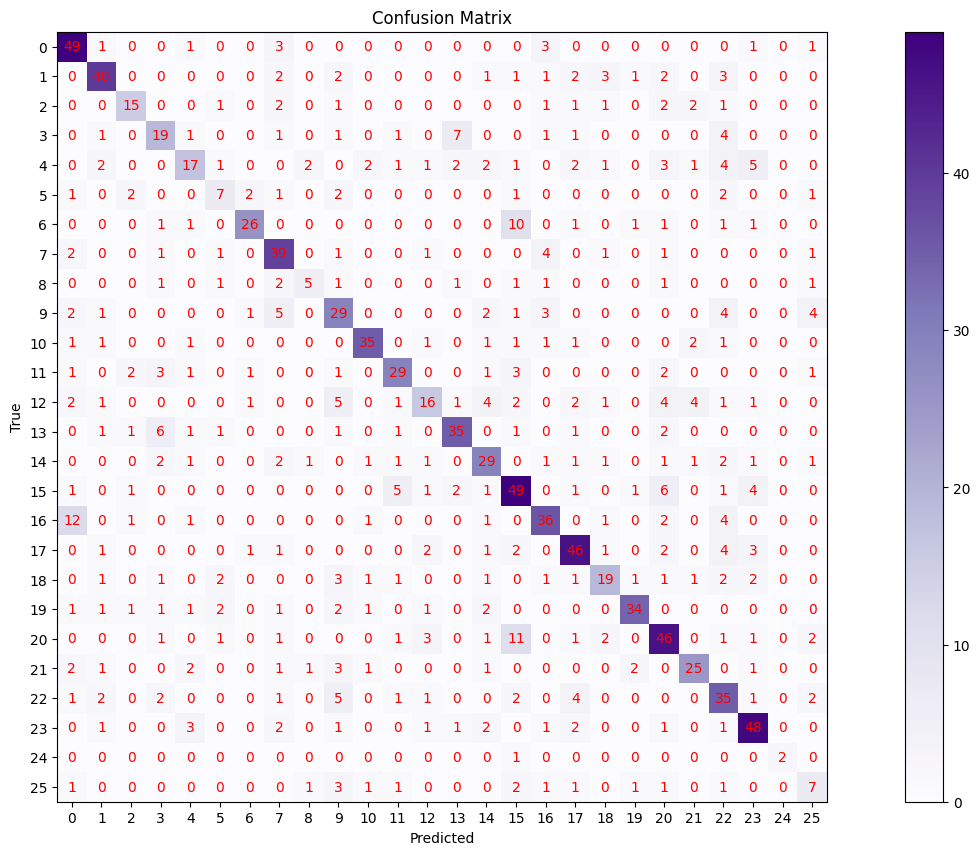

In [49]:
lr_accuracy = train_logistic_regression(X_train, y_train, X_test, y_test)


Accuracy: 0.31022823330515636
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.75      0.58        59
           1       0.53      0.16      0.24        58
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        47
           5       0.00      0.00      0.00        19
           6       0.00      0.00      0.00        43
           7       0.50      0.02      0.04        52
           8       0.00      0.00      0.00        15
           9       0.23      0.10      0.14        52
          10       1.00      0.30      0.47        46
          11       1.00      0.04      0.09        45
          12       0.00      0.00      0.00        46
          13       0.56      0.10      0.17        51
          14       1.00      0.02      0.04        47
          15       0.47      0.64      0.54        73
          16       0.22     

/home/vini/dev/cv-indexing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vini/dev/cv-indexing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vini/dev/cv-indexing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

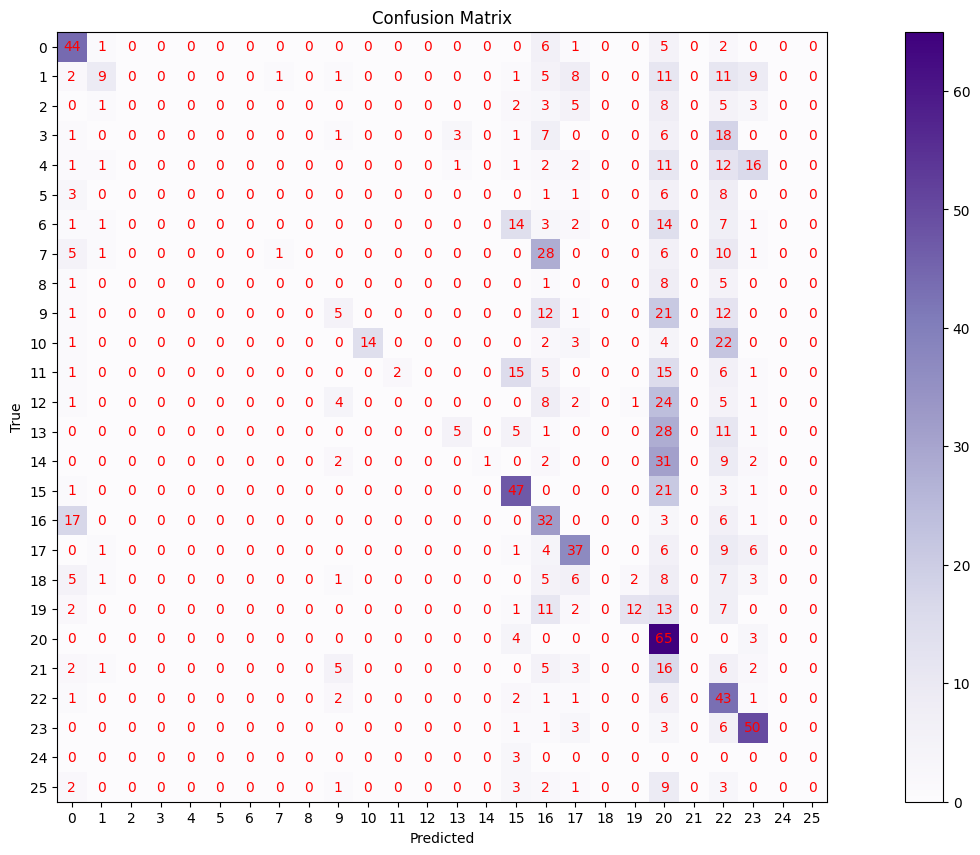

In [50]:
br_accuracy = train_bernoulli(X_train, y_train, X_test, y_test)

Accuracy: 0.7134404057480981
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.79        59
           1       0.89      0.84      0.87        58
           2       0.85      0.63      0.72        27
           3       0.68      0.46      0.55        37
           4       0.52      0.28      0.36        47
           5       0.85      0.58      0.69        19
           6       0.84      0.86      0.85        43
           7       0.68      0.73      0.70        52
           8       0.62      0.33      0.43        15
           9       0.60      0.48      0.53        52
          10       0.84      0.83      0.84        46
          11       0.74      0.78      0.76        45
          12       0.56      0.61      0.58        46
          13       0.74      0.76      0.75        51
          14       0.62      0.64      0.63        47
          15       0.76      0.92      0.83        73
          16       0.66      

/home/vini/dev/cv-indexing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vini/dev/cv-indexing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vini/dev/cv-indexing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

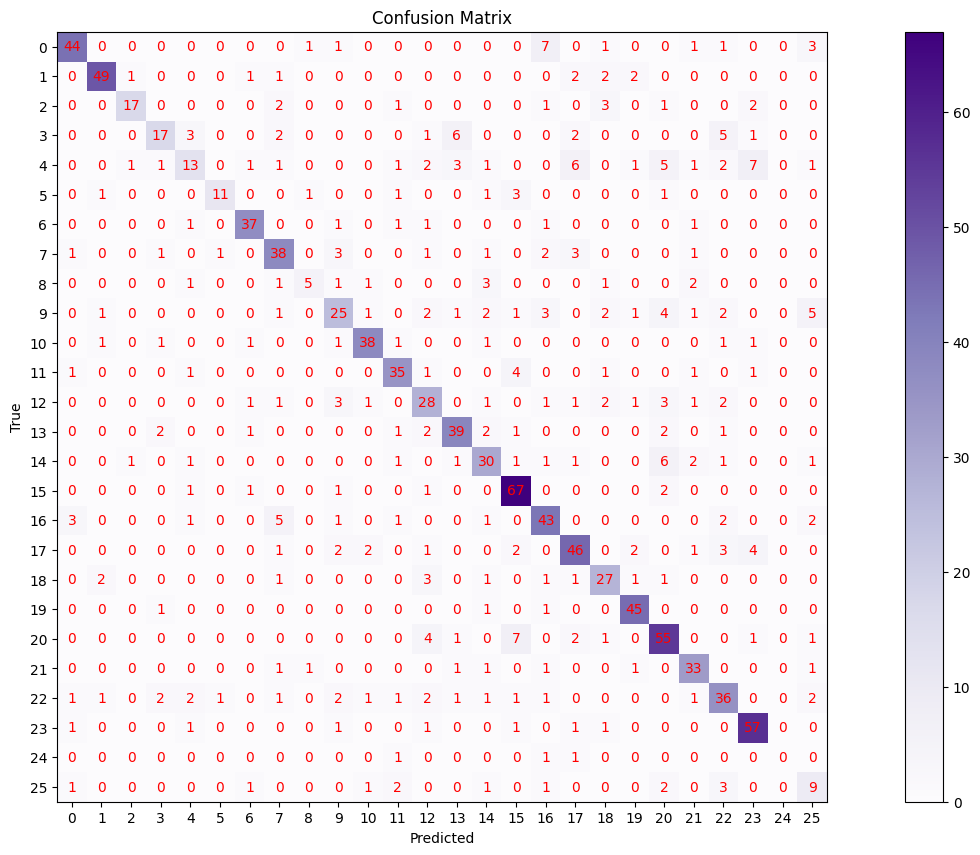

In [68]:
xg_accuracy2 = train_xgboost2(X_train, y_train, X_test, y_test)

Accuracy: 0.6939983093829247
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        59
           1       0.85      0.81      0.83        58
           2       0.80      0.59      0.68        27
           3       0.62      0.49      0.55        37
           4       0.51      0.38      0.44        47
           5       0.46      0.32      0.38        19
           6       0.73      0.84      0.78        43
           7       0.66      0.71      0.69        52
           8       0.55      0.40      0.46        15
           9       0.68      0.54      0.60        52
          10       0.83      0.87      0.85        46
          11       0.80      0.80      0.80        45
          12       0.53      0.65      0.58        46
          13       0.66      0.82      0.73        51
          14       0.67      0.60      0.63        47
          15       0.71      0.82      0.76        73
          16       0.66      

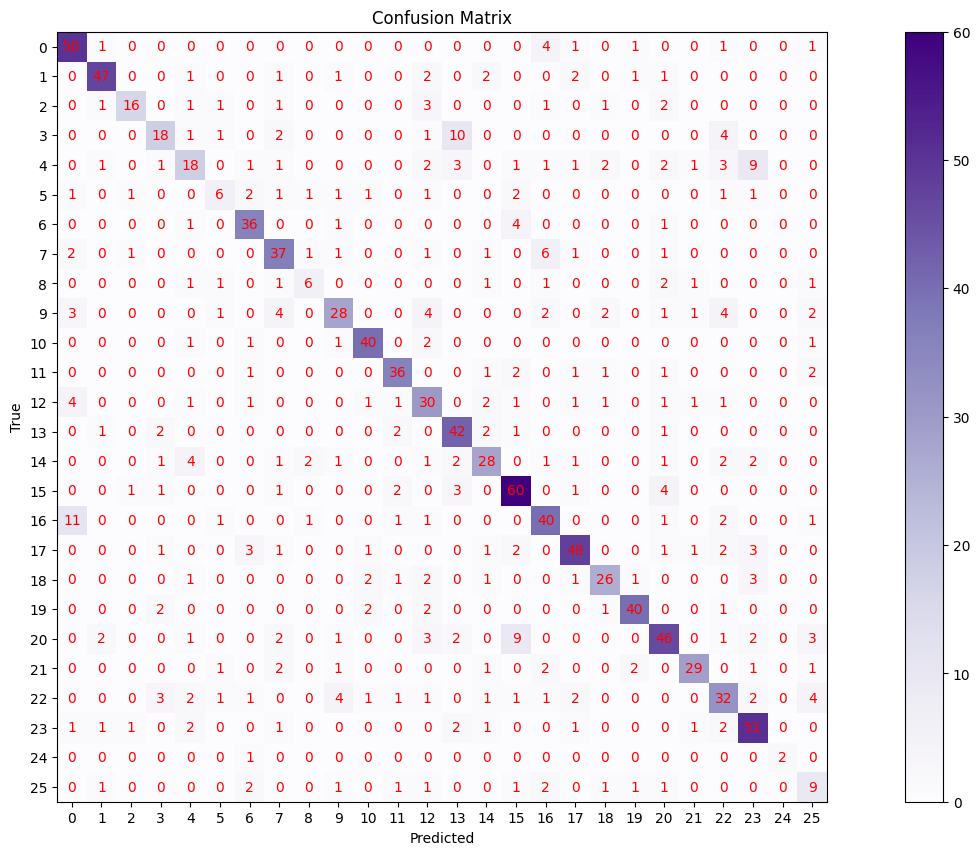

In [52]:
xg_accuracy = train_xgboost(X_train, y_train, X_test, y_test)

Accuracy: 0.4978867286559594
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.68      0.62        59
           1       0.34      0.50      0.40        58
           2       0.00      0.00      0.00        27
           3       0.58      0.19      0.29        37
           4       0.53      0.17      0.26        47
           5       0.00      0.00      0.00        19
           6       0.72      0.49      0.58        43
           7       0.62      0.48      0.54        52
           8       0.00      0.00      0.00        15
           9       0.51      0.48      0.50        52
          10       0.94      0.63      0.75        46
          11       0.83      0.56      0.67        45
          12       0.33      0.20      0.25        46
          13       0.80      0.63      0.70        51
          14       0.62      0.45      0.52        47
          15       0.31      0.78      0.44        73
          16       0.67      

/home/vini/dev/cv-indexing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vini/dev/cv-indexing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vini/dev/cv-indexing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

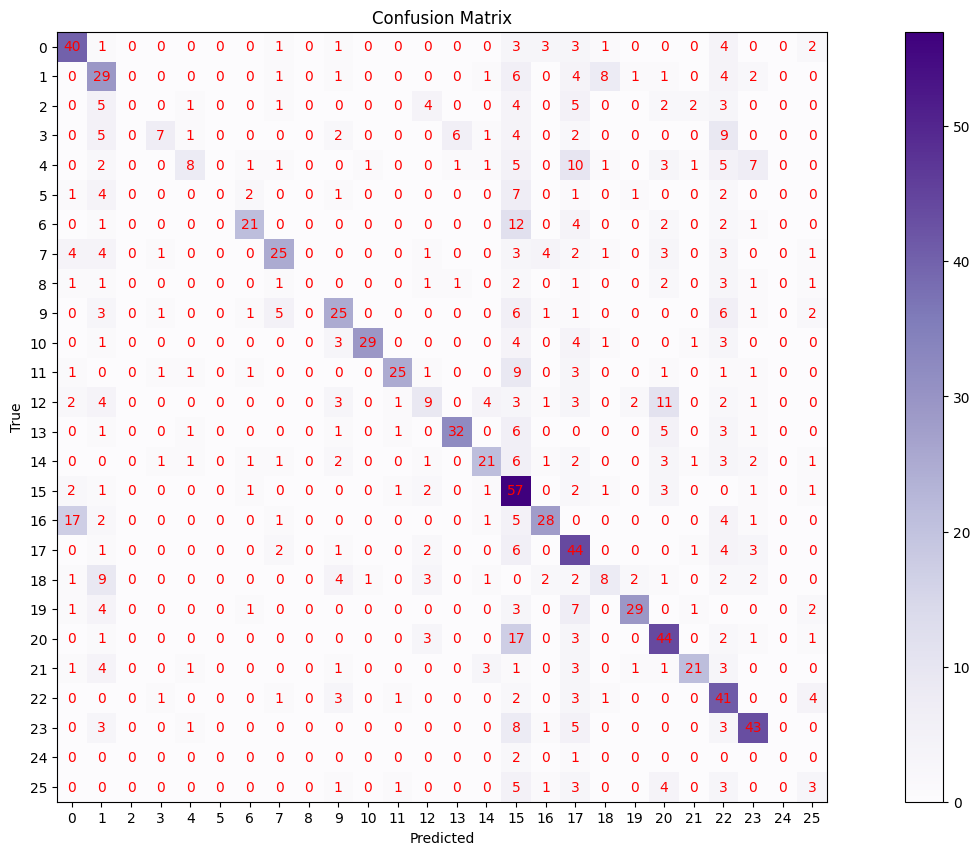

In [53]:
svm_accuracy = train_svm(X_train, y_train, X_test, y_test)

Accuracy: 0.6906170752324599
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.81        59
           1       0.86      0.72      0.79        58
           2       0.78      0.52      0.62        27
           3       0.79      0.51      0.62        37
           4       0.64      0.34      0.44        47
           5       0.55      0.32      0.40        19
           6       0.78      0.74      0.76        43
           7       0.63      0.75      0.68        52
           8       0.86      0.40      0.55        15
           9       0.49      0.44      0.46        52
          10       0.88      0.80      0.84        46
          11       0.86      0.82      0.84        45
          12       0.51      0.63      0.56        46
          13       0.75      0.84      0.80        51
          14       0.68      0.64      0.66        47
          15       0.68      0.86      0.76        73
          16       0.68      

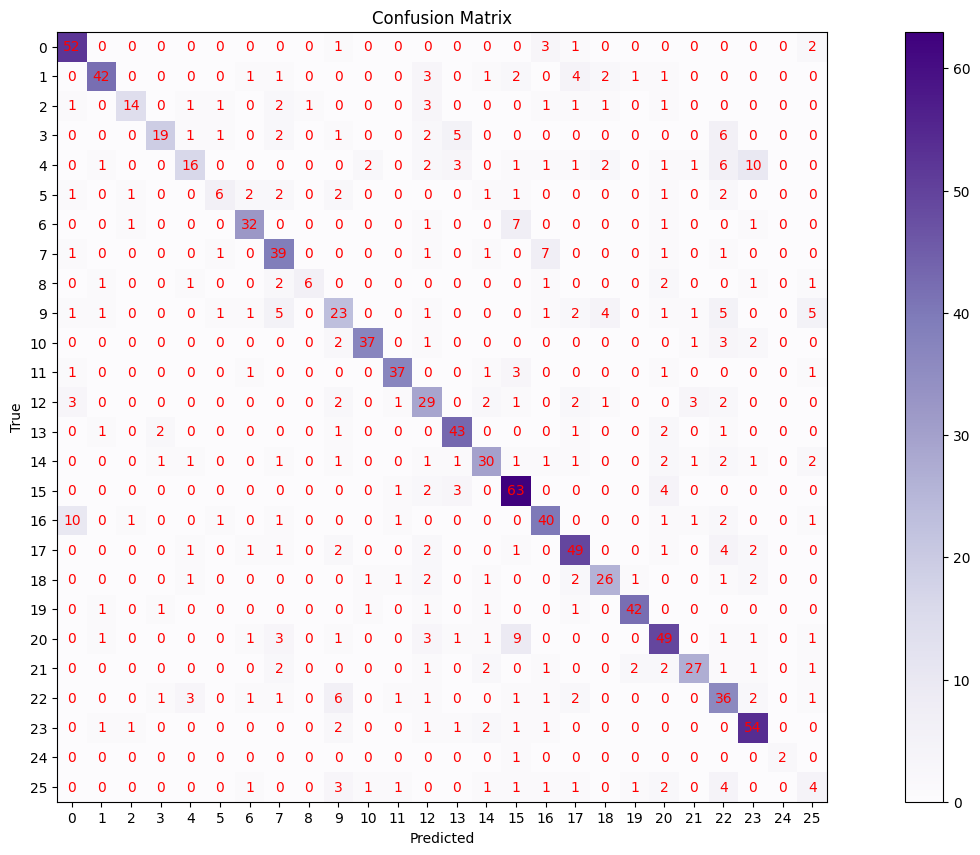

In [54]:
cat_accuracy = train_catboost(X_train,y_train,X_test,y_test)

In [69]:
accuracies = {
    'Naive Bayes': nb_accuracy,
    'Random Forest': rf_accuracy,
    'Logistic Regression': lr_accuracy,
    'Bernoulli': br_accuracy,
    'KNN = 9': knn_accuracy,
    'XGBoost': xg_accuracy,
    'SVM' : svm_accuracy,
    'XGBoost2' : xg_accuracy2,
    'CatBoost' : cat_accuracy
}

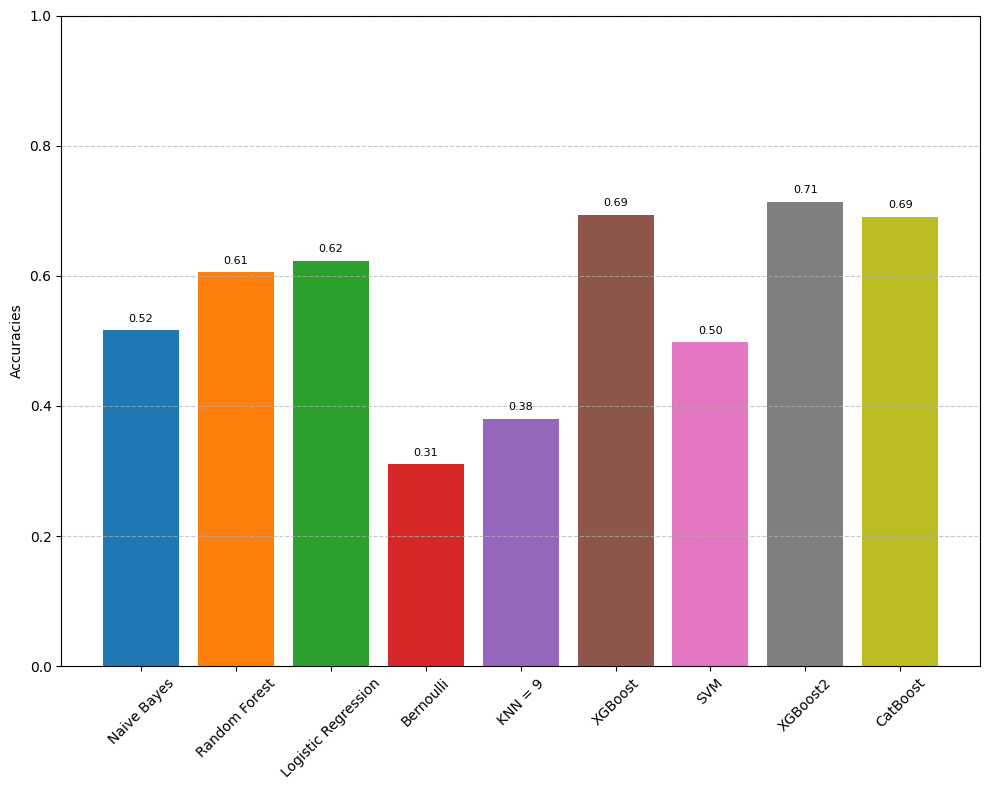

In [70]:
plot_accuracies(accuracies)